In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [6]:
# read in train data
with open('../data/train.json') as f:
    data = json.load(f)
    df = pd.DataFrame(data['data'])

In [7]:
# extract list of words from each utterance
df['words'] = df.apply(lambda row: row['utterance'].split(' '), axis=1)

# get first frame
df['first_frame_filename'] = df.apply(lambda row: row['frame_filenames'][0], axis=1)

number of results for "sand": 84


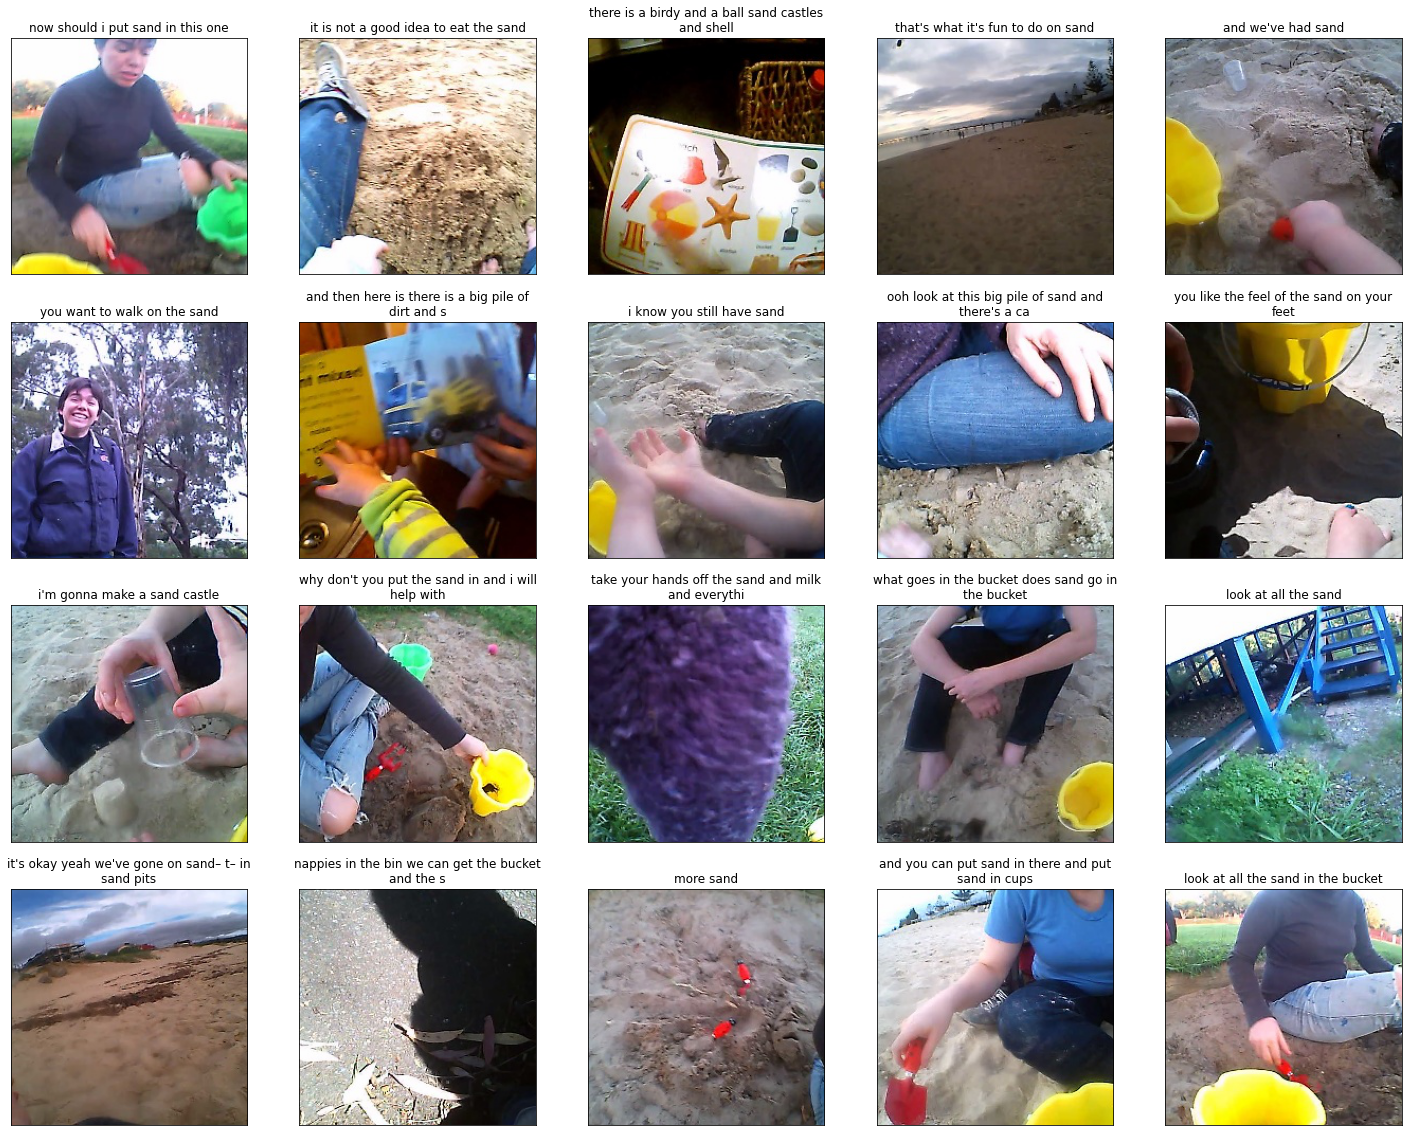

In [21]:
from textwrap import wrap

# data dir
data_dir = '../data/train_5fps'

# search query
query = 'sand'

# return results matching query
results = df[df.apply(lambda row: query in row['words'], axis=1)]
print(f'number of results for "{query}": {len(results)}')

# display first ten results
num_results = min(20, len(results))
top_results = results.sample(num_results)

plt.figure(figsize=(25, 20))
plt_count = 1
for idx, result in top_results.iterrows():
    # get utterance
    utterance = result['utterance']
    
    # get frame
    frame_filename = result['first_frame_filename']
    img = Image.open(os.path.join(data_dir, frame_filename))
    
    plt.subplot(4, 5, plt_count)
    plt.imshow(img)
    plt.title("\n".join(wrap(utterance[:50], 40)))
    plt.xticks([])
    plt.yticks([])
    
    plt_count += 1